<a href="https://colab.research.google.com/github/TasnimJumara/TableAssignmentFirst/blob/master/Experiment2_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import cv2
from customDataset import DigitFindingDataset

import warnings
import time,sys
import copy
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

from torch.utils.data import (
    Dataset,
    DataLoader,
) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
import pandas as pd

In [ ]:
dataset1=pd.read_csv(r'/content/sample_data/training-a.csv')

In [ ]:
dataset1.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
dataset1.drop('original filename',axis=1,inplace=True)

In [ ]:
dataset1.head()

,filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
dataset1.drop('scanid',axis=1,inplace=True)
dataset1.drop('database name original',axis=1,inplace=True)

In [ ]:
dataset1.head()

,filename,digit,contributing team,database name
0,a00000.png,5,Buet_Broncos,training-a
1,a00001.png,3,Buet_Broncos,training-a
2,a00002.png,1,Buet_Broncos,training-a
3,a00003.png,7,Buet_Broncos,training-a
4,a00004.png,0,Buet_Broncos,training-a


In [ ]:
dataset1.drop('contributing team',axis=1,inplace=True)
dataset1.drop('database name',axis=1,inplace=True)
dataset1.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
import os
from skimage import io

In [ ]:
dataset1

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
...,...,...
19697,a19697.png,4
19698,a19698.png,3
19699,a19699.png,8
19700,a19700.png,3


In [ ]:
dataset1.to_csv('updated_dataset.csv',index=False)

In [ ]:
ls

sample_data/  updated_dataset.csv


In [ ]:
IMAGE_SIZE = 40 
transform = transforms.Compose([
                                transforms.ToPILImage(),
                                # transforms.Grayscale(),
                                torchvision.transforms.ColorJitter(brightness=0.4,saturation=0.4,contrast=0.4,hue=0.4),
                                transforms.RandomRotation(20,expand=True), 
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE), ## image center crop
                                transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

In [ ]:
class DigitFindingDataset(Dataset):
  def _init_(self,csv_file,root_dir,tranform=None):
    self.annotations=pd.read_csv(csv_file)
    self.root_dir=root_dir
    self.transform=transform

In [ ]:
def _len_(self):
  return len(self.annotations)

In [ ]:
def _getitem_(self,index):
  img_path=os.path.join(self.root_dir,self.annotations.iloc[index,0])
  image=io.imread(img_path)
  y_label=torch.tensor(int(self.annotations.iloc[index,1]))

  if self.transform:
    image=self.tranform(image)

  return (image, y_label)

In [ ]:
dataset=DigitFindingDataset(csv_file="/content/drive/MyDrive/Assignment/updated_dataset.csv", root_dir="/content/drive/MyDrive/Assignment/training-a", transform=transforms.ToTensor())

In [ ]:
train_set, test_set=torch.utils.data.random_split(dataset,[15700, 4003])
train_loader=DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [ ]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
images.shape

torch.Size([20, 3, 40, 40])

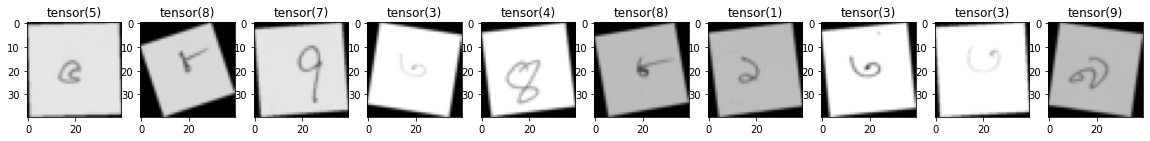

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next() 
plt.subplots(figsize=(20, 32))
for i in range(10):
    plt.subplot(10/2, 10,i+1)
    img = images[i].detach().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5]) 
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.title(labels[i])
    plt.imshow(img)
    plt.show()

In [ ]:
batch_size=100
num_iteration=1000
input_dimension=180*180
num_hiddennodes=20
output_dimension=10
learning_rate=.02
hidden_layers=4
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hiddennodes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, num_hiddennodes)
        self.leakyrelu_1 = nn.LeakyReLU()

        #self.linear_2 = nn.Linear(num_hiddennodes, num_hiddennodes)
        #self.softshrink_1 = nn.Softshrink()
  
        #self.linear_3 = nn.Linear(num_hiddennodes, num_hiddennodes)
       # self.hardtanh_1 = nn.Hardtanh()

        self.linear_4 = nn.Linear(num_hiddennodes,num_hiddennodes)
        self.logsigmoid_1 = nn.LogSigmoid()

        self.linear_out = nn.Linear(num_hiddennodes, num_classes)

    def forward(self, x):
       
        out = self.linear_1(x)
        out = self.leakyrelu_1(out)
        
        #out  = self.linear_2(out)
        #out = self.softshrink_1(out)

        #out  = self.linear_3(out)
        #out = self.hardtanh_1(out)

        out  = self.linear_4(out)
        out = self.logsigmoid_1(out)

        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dimension,
                               num_classes = output_dimension,
                               num_hiddennodes = num_hiddennodes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 3*40*40).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 3*40*40).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)


                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

[2.299708366394043, 2.0467870235443115, 1.2123138904571533, 0.6822490096092224, 0.4486219882965088, 0.24277591705322266, 0.33326977491378784, 0.2884293794631958, 0.29108020663261414, 0.31275543570518494, 0.3199012279510498, 0.32454678416252136, 0.2716137766838074, 0.4110594093799591, 0.21572823822498322, 0.2877638339996338, 0.18067780137062073, 0.3477727770805359, 0.30747485160827637]


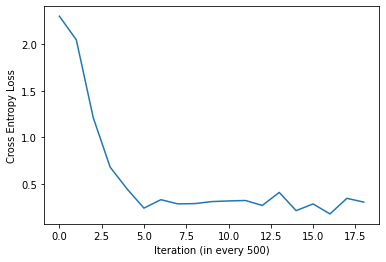

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()